In [22]:
DATA_PATH="/Users/sidnpoo/Downloads/MLStuff_DoNotDelete/myGitHub/DeepLearning/monkey_species/dataset"

TRAIN_PATH=DATA_PATH+"/training"
VAL_PATH=DATA_PATH+"/validation"


In [23]:
#get catagories
import pandas as pd
df = pd.read_csv(DATA_PATH+ "/monkey_labels.txt")
print(df.head(100))
labels = list(df.Label)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [24]:
import os
monkey_species = os.listdir(TRAIN_PATH)
print("Number of Categories:", len(monkey_species))
print("Categories: ", monkey_species)

Number of Categories: 11
Categories:  ['.DS_Store', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [25]:
# dimensions of our images.
img_width, img_height = 224, 224 # we set the img_width and img_height according to the pretrained models we are
# going to use. The input size for ResNet-50 is 224 by 224 by 3.


In [26]:
batch_size = 4

In [27]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from keras import models, layers, optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
#model.fit(train_X, train_y, batch_size=64, epochs=15, verbose=1, validation_data=(test_X, test_y),callbacks=[calls])
#model.save_weights('my_model_weights_mod.h5')
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=40,
        # randomly shift images horizontally
        width_shift_range=0.2,
        # randomly shift images vertically
        height_shift_range=0.25,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=True,
shear_range=0.2,
    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [28]:
nb_train_samples = len(train_generator.classes)
nb_validation_samples = len(validation_generator.classes)

In [29]:
training_data = pd.DataFrame(train_generator.classes, columns=['classes'])
testing_data = pd.DataFrame(validation_generator.classes, columns=['classes'])
training_data.head

<bound method NDFrame.head of       classes
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
...       ...
1067        9
1068        9
1069        9
1070        9
1071        9
1072        9
1073        9
1074        9
1075        9
1076        9
1077        9
1078        9
1079        9
1080        9
1081        9
1082        9
1083        9
1084        9
1085        9
1086        9
1087        9
1088        9
1089        9
1090        9
1091        9
1092        9
1093        9
1094        9
1095        9
1096        9

[1097 rows x 1 columns]>

/Users/sidnpoo/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


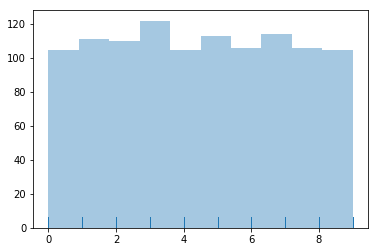

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(training_data, kde=False, rug=True);


In [31]:
#import inception with pre-trained weights. do not include fully #connected layers
Xception_base = applications.Xception(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = Xception_base.output
x = layers.GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = layers.Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = layers.Dense(int(len(train_generator.class_indices.keys())), activation='softmax')(x)
# create the full network so we can train on it
Xception_transfer = models.Model(inputs=Xception_base.input, outputs=predictions)

In [32]:
Xception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
history = Xception_transfer.fit_generator(
    train_generator,
    epochs=10, shuffle = True, verbose = 1, validation_data = validation_generator)

Epoch 1/10
 61/275 [=====>........................] - ETA: 49:11:14 - loss: 2.3157 - acc: 0.1230

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()